In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

In [2]:
#importing through its directory
churn = pd.read_csv("Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#checking data information
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#checking out number of rows and columns present in the dataframe
churn.shape

(10000, 14)

In [5]:
#Highlighting statistical summary of data
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#checking out missing values
churn.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


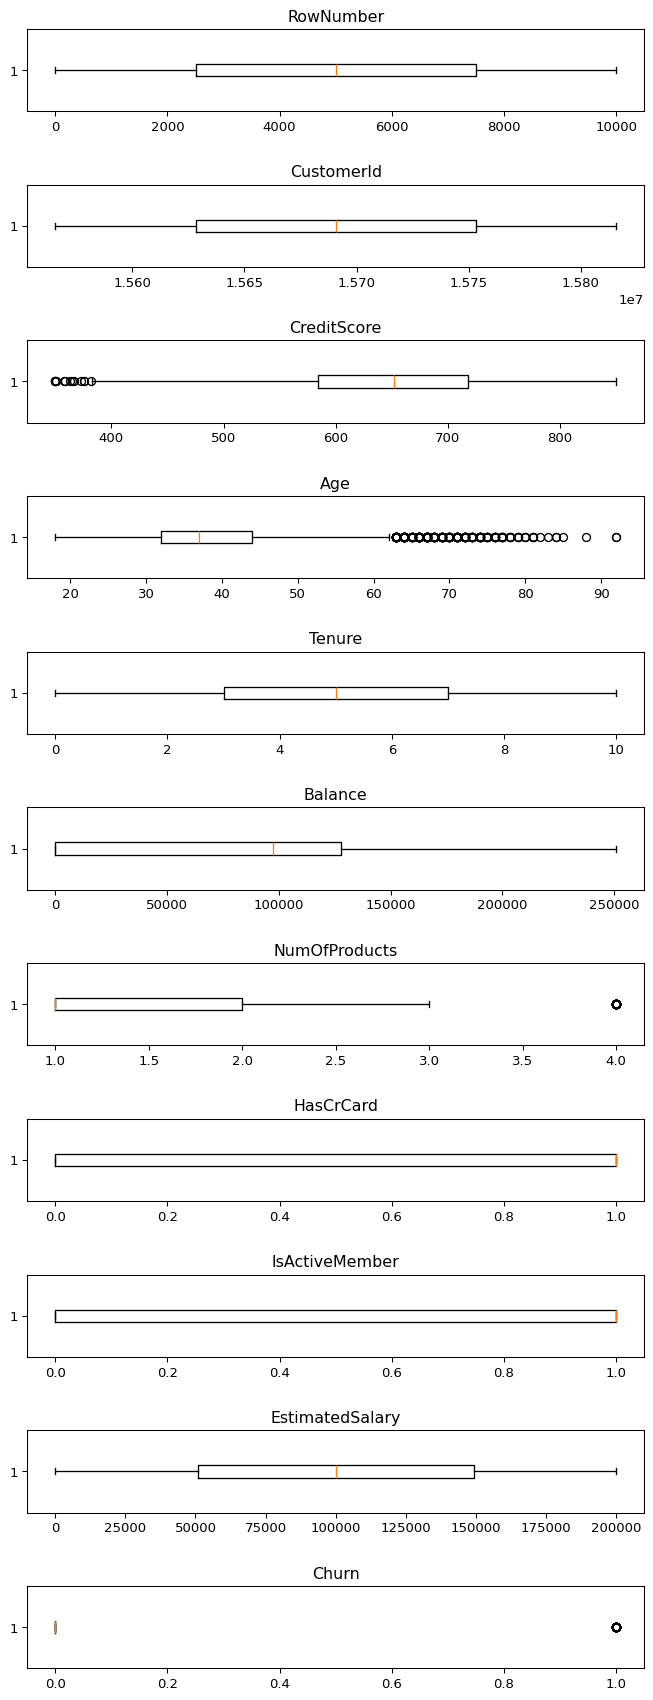

In [7]:
#checking out for possible outliers
numeric_churn_cols = churn.select_dtypes(include=np.number).columns
fig, axis = plt.subplots(len(numeric_churn_cols),1, figsize=(7, 18),dpi = 95)
for i, col in enumerate(numeric_churn_cols):
  axis[i].boxplot(churn[col], vert = False)
  axis[i].set_title(col)
plt.tight_layout()
plt.show()

In [8]:
#Trying to remove possible outliers
q1, q3 = np.percentile(churn["Age"], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
clean_churn = churn[(churn["Age"] >= lower_bound) & (churn["Age"] <= upper_bound)]

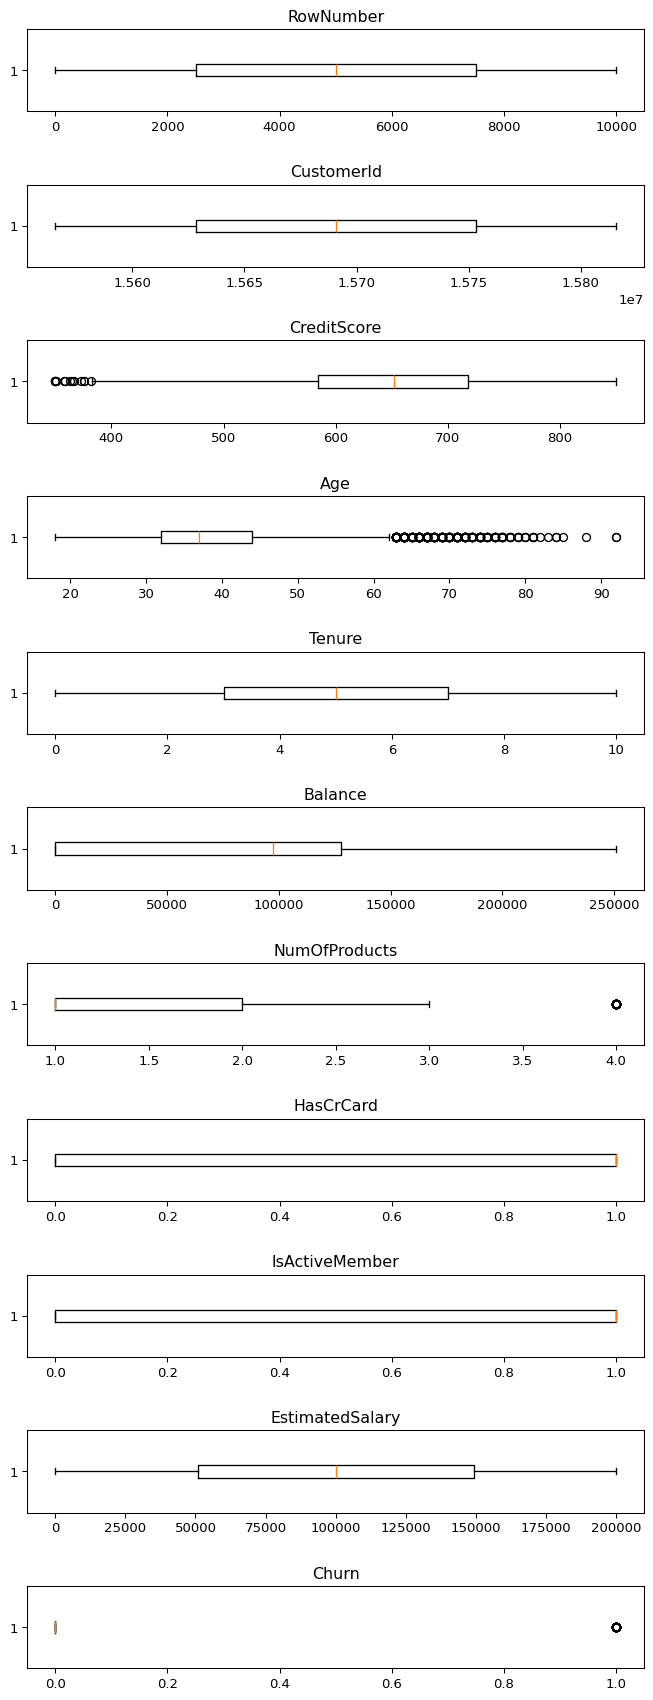

In [9]:
numeric_churn_cols = churn.select_dtypes(include=np.number).columns
fig, axis = plt.subplots(len(numeric_churn_cols),1, figsize=(7, 18),dpi = 95)
for i, col in enumerate(numeric_churn_cols):
  axis[i].boxplot(churn[col], vert = False)
  axis[i].set_title(col)
plt.tight_layout()
plt.show()

In [10]:
# Dropping irrelevant columns: They do not help prediction because they are just identifiers and introduce noise.
churn = churn.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# checking correlation of numerical columns with the actual target (Churn)
# Define numeric_cols for correlation analysis, excluding the target 'Churn'.
numeric_cols = churn.select_dtypes(include=np.number).columns.drop('Churn').tolist()
churn[numeric_cols].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


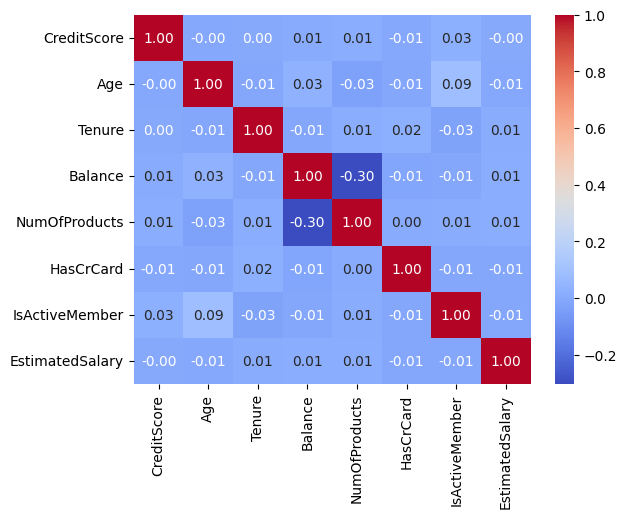

In [12]:
#Visualizing correlation of features with target
sns.heatmap(churn[numeric_cols].corr(), annot=True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [13]:
# correlation of features with target in descending order
target_corr = churn[numeric_cols + ['Churn']].corr()['Churn']
target_corr_sorted = (target_corr*100).abs().sort_values(ascending=False)

print(target_corr_sorted)

Churn              100.000000
Age                 28.532304
IsActiveMember      15.612828
Balance             11.853277
NumOfProducts        4.781986
CreditScore          2.709354
Tenure               1.400061
EstimatedSalary      1.209686
HasCrCard            0.713777
Name: Churn, dtype: float64


In [14]:
#Encoding categorical variables
X = churn.drop("Churn", axis=1)
y = churn["Churn"]
categorical_cols = ["Geography", "Gender"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

In [15]:
#Splitting data into train_test_split, testing with 20% and training 80%

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
# Handling class imbalance to avoid models predicting “Not Churn” for everyone
X_train_processed = preprocessor.fit_transform(X_train)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_processed, y_train)

In [17]:
# Building model using Logistic Regression Pipeline
log_model = Pipeline(steps=[
    ("model", LogisticRegression(max_iter=500))
])

In [18]:
log_model.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('model', LogisticRegression(max_iter=500))])

In [19]:
#Evaluating metrics
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]


    print(classification_report(y_test, preds))
    print("AUC-ROC:", roc_auc_score(y_test, probs))

In [20]:
X_test_processed = preprocessor.transform(X_test)
evaluate(log_model, X_test_processed, y_test)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000

AUC-ROC: 0.7746544695697237


The AUC-ROC summarizes the ability of the model to distinguish classes. The value of the Area Under Curve signifies a fair ability of the model to distinguish negative classses vs positive classes


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = Pipeline(steps=[
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])
rf_model.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('model',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [23]:
evaluate(rf_model, X_test_processed, y_test)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1593
           1       0.64      0.58      0.61       407

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.84      0.85      0.85      2000

AUC-ROC: 0.8513575208490463


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1544   49]
 [ 226  181]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



85% accuracy using the Random Forest Classifier signifies that the model is good enough to be used.

In [25]:
from xgboost import XGBClassifier

In [26]:
xgb_model = Pipeline(steps=[
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        eval_metric="logloss",
        subsample=0.8,
        colsample_bytree=0.8
    ))
])

In [27]:
xgb_model.fit(X_train_resampled, y_train_resampled)
evaluate(xgb_model, X_test_processed, y_test)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1593
           1       0.70      0.58      0.63       407

    accuracy                           0.86      2000
   macro avg       0.80      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000

AUC-ROC: 0.8647167969201865


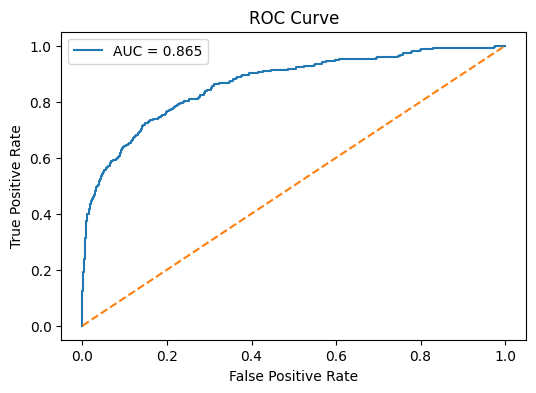

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = xgb_model.predict_proba(X_test_processed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Amongst all the models used for the Churn data, the XGB Classifier has better model accuracy with 86%

In [29]:
churn.to_csv("churn_prediction.csv", index=False)